# Data Science Project - Churn Data
- Validando o resultado pela Matriz de Custo para criarmos soluções práticas para o problema de negocio.

## Bibliotecas Necessárias

In [1]:
# Bibliotecas de análise de dados
import pandas as pd
import numpy as np
import missingno as missing

# Bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteca do Pré-Processamento - PRÉ-PROCESSAMENTO
from sklearn.preprocessing import StandardScaler

# Biblioteca do modelo de ML - MODELO
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Biblioteca para Combinação de modelo
from sklearn.ensemble import RandomForestClassifier

# Biblioteca de validação - VALIDAÇÃO
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Bibliotecas para Tunagem de Hiper Parâmetros
from sklearn.model_selection import GridSearchCV

# Biblioteca para criar um metrica personalizada ao Negocio
from sklearn.metrics import make_scorer


import warnings
warnings.filterwarnings('ignore')

## Importação e Preparação dos Dados

In [2]:
# fonte: https://kaggle.comshrutimechlearn/churn-modelling
url = 'https://raw.githubusercontent.com/wanderson-blima/problema_de_churn/master/Dados/Churn_Modelling.csv'
dados = pd.read_csv(url)
dados.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Análise prévia dos dados

In [3]:
# Função para realizar uma análise inicial do conjunto de dados:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-' * 50)
    print('TIPO DE DADOS POR FEATURE:')
    print(data.info())
    print('\n', '-' * 50)
    print('VALORES UNICOS POR FEATURE', '\n')
    print(data.nunique())
    print('\n', '-' * 50)
    print('VALORES NULOS POR FEATURE')
    print(data.isnull().sum())
    print('\n', '-' * 50)
    print('INFORMAÇÕES QUANTITATIVAS')
    print(data.describe())


show_info(dados)

DATASET SHAPE:  (10000, 14) 

--------------------------------------------------
TIPO DE DADOS POR FEATURE:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory u

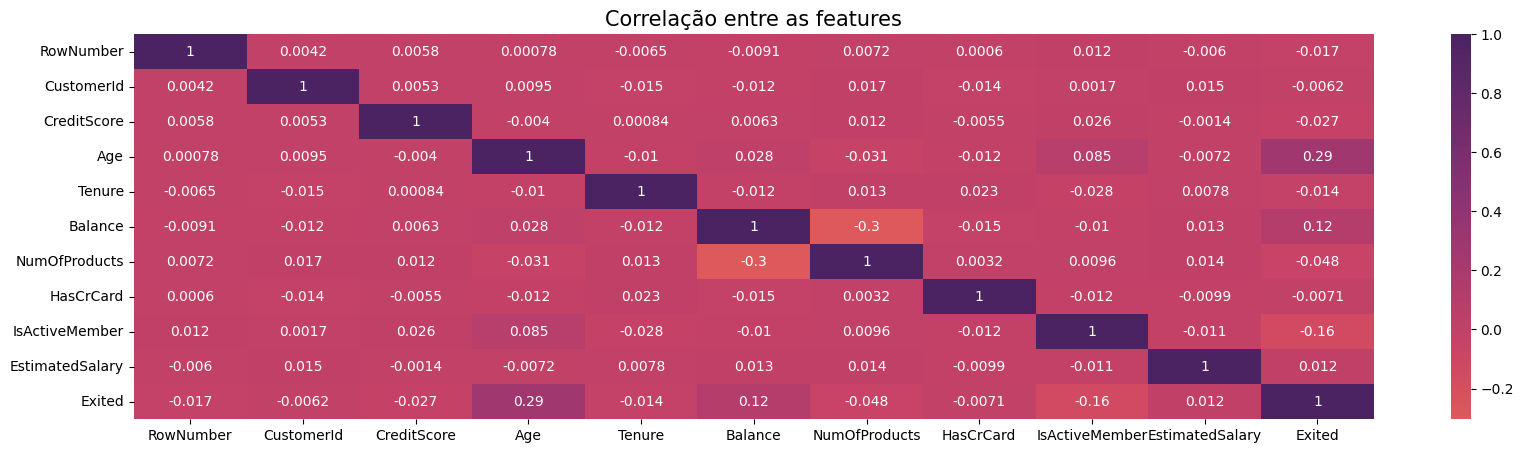

In [4]:
# Análise de correlação entre as features: 
plt.figure(figsize=(20,5))
plt.title('Correlação entre as features', size=15)
sns.heatmap(dados.corr(), cmap='flare', center=0, annot=True)
plt.show();

### Pré-processamento para Machine Learning

In [5]:
dados.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


1. Remover variáveis não importantes

In [6]:
# Removendo de variáveis que não importantes para a criação do modelo
dados.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [7]:
dados.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


2. Verificar dados faltantes

In [8]:
# verificar dados nulos
dados.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

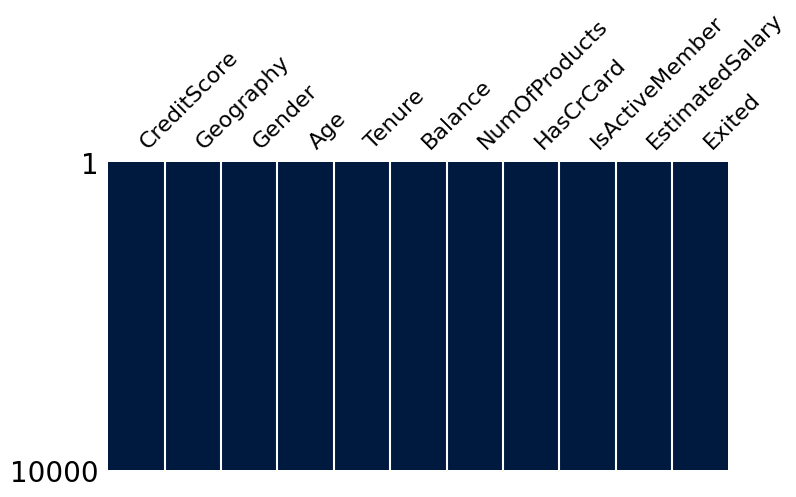

In [9]:
# Análisando valores nulos de forma gráfica
missing.matrix(dados, figsize = (8, 4), color = (0, 0.1, 0.25), sparkline = False);

3. Categorização de variáveis continuas

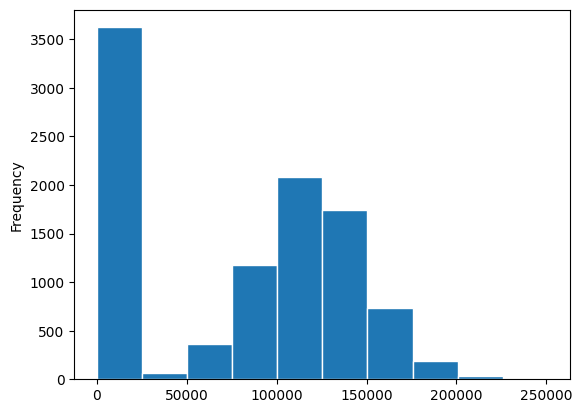

In [10]:
# Categorizando a variável 'Balance'
dados['Balance'].plot(kind = 'hist', edgecolor = 'white'); # plotando o histograma para análisar a distribuição dos dados

In [11]:
# análisando informações estatisticas sem os valores 0
dados[dados['Balance'] > 0]['Balance'].describe()

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: Balance, dtype: float64

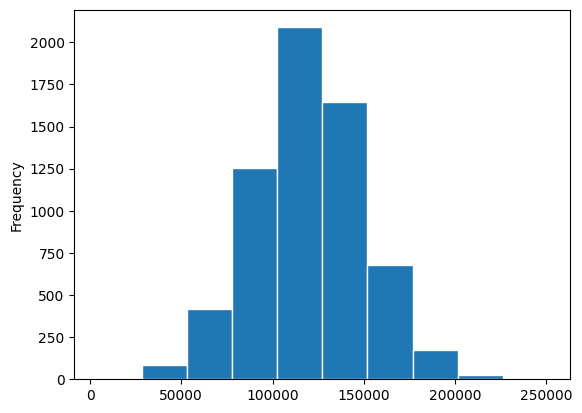

In [12]:
# plotando o histograma para análisar a distribuição dos dados sem os valores 0
dados[dados['Balance'] > 0]['Balance'].plot(kind = 'hist', edgecolor = 'white');

In [13]:
# Criando um função auxiliar para Categorizar a variável 'Balance'
def auxiliar(x):
    if x == 0:
        return 'zero'
    elif x < 100000:
        return '0-100k'
    else:
        return '100k+'

dados['Saldo'] = dados['Balance'].apply(auxiliar)
dados.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Saldo
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,zero
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0-100k
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,100k+
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,zero
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,100k+


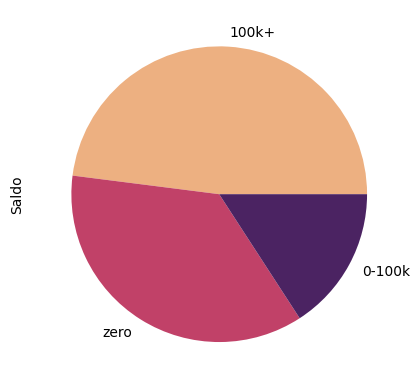

In [14]:
dados['Saldo'].value_counts().plot(kind = 'pie', colormap = 'flare');

4. Agrupamento de categorias

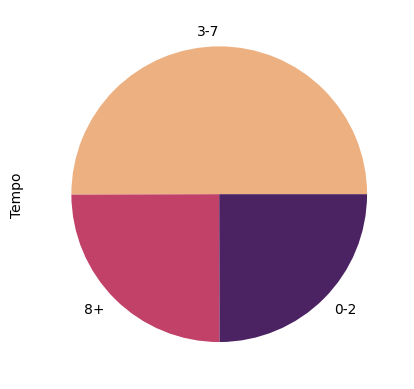

In [15]:
# Criando um função auxiliar para Categorizar a variável 'Tenure'
def auxiliar(x):
    if x < 3:
        return '0-2'
    elif x < 8:
        return '3-7'
    else:
        return '8+'

dados['Tempo'] = dados['Tenure'].apply(auxiliar)
dados['Tempo'].value_counts().plot(kind = 'pie', colormap = 'flare');

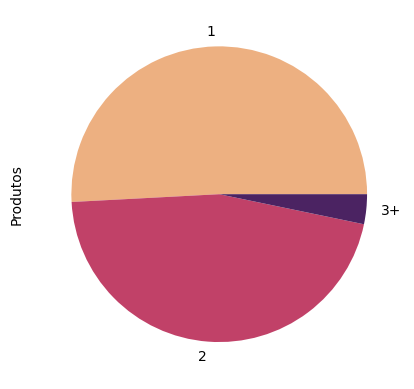

In [16]:
# Criando um função auxiliar para Categorizar a variável 'NumOfProducts'
def auxiliar(x):
    if x == 1:
        return '1'
    elif x == 2:
        return '2'
    else:
        return '3+'

dados['Produtos'] = dados['NumOfProducts'].apply(auxiliar)
dados['Produtos'].value_counts().plot(kind = 'pie', colormap = 'flare');

In [17]:
# Removendo de variáveis agrupadas
dados.drop(['Balance', 'Tenure', 'NumOfProducts'], axis = 1, inplace = True)
dados.head()

,CreditScore,Geography,Gender,Age,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Saldo,Tempo,Produtos
0,619,France,Female,42,1,1,101348.88,1,zero,0-2,1
1,608,Spain,Female,41,0,1,112542.58,0,0-100k,0-2,1
2,502,France,Female,42,1,0,113931.57,1,100k+,8+,3+
3,699,France,Female,39,0,0,93826.63,0,zero,0-2,2
4,850,Spain,Female,43,1,1,79084.10,0,100k+,0-2,1


5. Dummyficação de variáveis

In [18]:
# Transformando as variaveis categoricas em colunas númericas
dados = pd.get_dummies(dados, columns=['Geography', 'Gender', 'Saldo', 'Tempo', 'Produtos'], drop_first = True)

In [19]:
dados.head()

,CreditScore,Age,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Saldo_100k+,Saldo_zero,Tempo_3-7,Tempo_8+,Produtos_2,Produtos_3+
0,619,42,1,1,101348.88,1,0,0,0,0,1,0,0,0,0
1,608,41,0,1,112542.58,0,0,1,0,0,0,0,0,0,0
2,502,42,1,0,113931.57,1,0,0,0,1,0,0,1,0,1
3,699,39,0,0,93826.63,0,0,0,0,0,1,0,0,1,0
4,850,43,1,1,79084.10,0,0,1,0,1,0,0,0,0,0


6. Padronizações

In [20]:
sc = StandardScaler()

In [21]:
# Padronizando as variaveis continuas
aux0 = sc.fit_transform(dados[['CreditScore', 'Age', 'EstimatedSalary']])
aux1 = pd.DataFrame(aux0, columns = ['Escore', 'Idade', 'Salario'])
dados = pd.concat([dados, aux1], axis = 1)
dados.drop(['CreditScore', 'Age', 'EstimatedSalary'], axis = 1, inplace = True)

In [22]:
dados.head()

,HasCrCard,IsActiveMember,Exited,Geography_Germany,Geography_Spain,Gender_Male,Saldo_100k+,Saldo_zero,Tempo_3-7,Tempo_8+,Produtos_2,Produtos_3+,Escore,Idade,Salario
0,1,1,1,0,0,0,0,1,0,0,0,0,-0.326221,0.293517,0.021886
1,0,1,0,0,1,0,0,0,0,0,0,0,-0.440036,0.198164,0.216534
2,1,0,1,0,0,0,1,0,0,1,0,1,-1.536794,0.293517,0.240687
3,0,0,0,0,0,0,0,1,0,0,1,0,0.501521,0.007457,-0.108918
4,1,1,0,0,1,0,1,0,0,0,0,0,2.063884,0.388871,-0.365276


## Machine Learning

In [23]:
# Configuração da Validação Cruzada
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

In [24]:
# Fazendo a Divisão em Teste e Treinamento
x = dados.drop('Exited', axis = 1)
y = dados['Exited']

xtreino, xteste, ytreino, yteste  = train_test_split(x, y, test_size = 1000)

In [25]:
# Definindo a métrica de interesse
metrica = 'f1'

In [26]:
# Definindo uma função para retornar todas as métricas da matriz de confusão
def MetricasClassBinaria(observado, predito, custo = None):
    mc = confusion_matrix(observado, predito)
    vn, fp, fn, vp = mc.flatten()

    pre = observado.mean()
    acc = (vn + vp) / (vn + fp + fn + vp)
    sen = vp/(vp + fn)
    esp = vn/(vn + fp)
    vpp = vp/(vp +fp)
    vpn = vn/(vn + fn)
    mcc = (vp*vn - fp*fn) / np.sqrt((vp + fp) * (vp + fn) * (vn + fp) * (vn + fn))
    f1s = 2*vpp*sen/(vpp + sen)
    efi = (sen + esp) / 2

    print(f'  Prevalência de Positivos: {pre:.4f}')
    print(f'                  Acurácia: {acc:.4f}')
    print(f'             Sensibilidade: {sen:.4f}')
    print(f'            Especificidade: {esp:.4f}')
    print(f'  Valor Preditivo Positivo: {vpp:.4f}')
    print(f'  Valor Preditivo Negativo: {vpn:.4f}')
    print(f'Coef. de Corr. de Matthews: {mcc:.4f}')
    print(f'                  F1-Score: {f1s:.4f}')
    print(f'                Eficiência: {efi:.4f}')

    metricas = {'prevalência': pre, 'acurácia': acc, 'sensibilidade': sen,
                'especificidade': esp, 'vpp': vpp, 'vpn': vpn, 'mcc': mcc, 
                'f1-score': f1s, 'eficiência': efi }

    if custo is not None:
        cost = (mc * np.array(custo).reshape(2, 2)).sum()
        print(f'\n                     Custo: {cost}')
        metricas['custo'] = cost

    return metricas

### Regressão Logistica

In [27]:
# Verificando a Performance da Regressão Logística

reglog = cross_val_score(LogisticRegression(), xtreino, ytreino, cv = validacao, scoring = metrica)

print(f'F1-Score: {reglog.mean():.2%}')

F1-Score: 48.95%


In [28]:
reglog = LogisticRegression()
reglog.fit(xtreino, ytreino)
pred_reglog = reglog.predict(xteste)

met_reglog = MetricasClassBinaria(yteste, pred_reglog)

  Prevalência de Positivos: 0.1980
                  Acurácia: 0.8560
             Sensibilidade: 0.4141
            Especificidade: 0.9651
  Valor Preditivo Positivo: 0.7455
  Valor Preditivo Negativo: 0.8697
Coef. de Corr. de Matthews: 0.4830
                  F1-Score: 0.5325
                Eficiência: 0.6896


### K Vizinhos Mais Próximos

In [29]:
# Encontrando o melhor valor de K através de Validação Cruzada K-FOLD
valores = np.arange(1, 51, 3)
parametros = {'n_neighbors': valores}

clf = GridSearchCV(KNeighborsClassifier(), param_grid = parametros, cv = validacao, scoring = metrica)
clf.fit(xtreino, ytreino)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49])},
             scoring='f1')

In [30]:
# Escolha do melhor K
print(clf.cv_results_['mean_test_score'])
print(clf.best_params_)

[0.46546556 0.40258136 0.47840731 0.423412   0.4592297  0.42277336
 0.4521367  0.42166968 0.43846271 0.41257447 0.4266158  0.40810083
 0.41959938 0.40263112 0.41527544 0.39819548 0.4075943 ]
{'n_neighbors': 7}


In [31]:
# Verificando a performance do KNN para um dado valor de K
knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(xtreino, ytreino)
pred_knn7 = knn7.predict(xteste)

met_knn7 = MetricasClassBinaria(yteste, pred_knn7)

  Prevalência de Positivos: 0.1980
                  Acurácia: 0.8440
             Sensibilidade: 0.3939
            Especificidade: 0.9551
  Valor Preditivo Positivo: 0.6842
  Valor Preditivo Negativo: 0.8646
Coef. de Corr. de Matthews: 0.4377
                  F1-Score: 0.5000
                Eficiência: 0.6745


### Árvore de Decisão

In [32]:
# Encontrando o melhor valor do 'max_depth' através de Validação Cruzada K-FOLD

valores = np.arange(2, 15, 1)
parametros = {'max_depth': valores}

clf = GridSearchCV(DecisionTreeClassifier(), param_grid = parametros, cv = validacao, scoring = metrica)
clf.fit(xtreino, ytreino)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='f1')

In [33]:
# Escolha do melhor max_depth
print(clf.cv_results_['mean_test_score'])
print(clf.best_params_)

[0.55409753 0.49009276 0.52189552 0.56910373 0.53832253 0.55320354
 0.55513484 0.53919834 0.53330078 0.52378384 0.52191218 0.51341626
 0.50456161]
{'max_depth': 5}


In [34]:
# Verificando a Performance da arvor para o valor de max_depth 

arvore = DecisionTreeClassifier(max_depth = 5)
arvore.fit(xtreino, ytreino)
pred_arvore = arvore.predict(xteste)

met_arvore = MetricasClassBinaria(yteste, pred_arvore)

  Prevalência de Positivos: 0.1980
                  Acurácia: 0.8650
             Sensibilidade: 0.4899
            Especificidade: 0.9576
  Valor Preditivo Positivo: 0.7405
  Valor Preditivo Negativo: 0.8838
Coef. de Corr. de Matthews: 0.5285
                  F1-Score: 0.5897
                Eficiência: 0.7238


### Random Forests

In [35]:
# Encontrando o melhor valor do 'max_depth' através de Validação Cruzada K-FOLD

valores = np.arange(2, 15, 1)
parametros = {'max_depth': valores}

clf = GridSearchCV(RandomForestClassifier(), param_grid = parametros, cv = validacao, scoring = metrica)
clf.fit(xtreino, ytreino)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='f1')

In [36]:
# Escolha do melhor max_depth
print(clf.cv_results_['mean_test_score'])
print(clf.best_params_)

[0.10040146 0.19613801 0.35653837 0.44264949 0.49477486 0.53317748
 0.54736877 0.55299425 0.561957   0.57104847 0.56954594 0.57334067
 0.57491429]
{'max_depth': 14}


In [37]:
# Verificando a Performance da arvor para o valor de max_depth 

rf = RandomForestClassifier(max_depth = 14)
rf.fit(xtreino, ytreino)
pred_rf = rf.predict(xteste)

met_rf = MetricasClassBinaria(yteste, pred_rf)

  Prevalência de Positivos: 0.1980
                  Acurácia: 0.8630
             Sensibilidade: 0.4545
            Especificidade: 0.9638
  Valor Preditivo Positivo: 0.7563
  Valor Preditivo Negativo: 0.8774
Coef. de Corr. de Matthews: 0.5149
                  F1-Score: 0.5678
                Eficiência: 0.7092


## Síntase dos Resultados

In [38]:
# Regressão Logística
reglog = LogisticRegression()
reglog.fit(xtreino, ytreino)
pred_reglog = reglog.predict(xteste)
met_reglog = MetricasClassBinaria(yteste, pred_reglog, custo = [0, 1, 10, 1])

# KNNs
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtreino, ytreino)
pred_knn = knn.predict(xteste)
met_knn3 = MetricasClassBinaria(yteste, pred_knn, custo = [0, 1, 10, 1])

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtreino, ytreino)
pred_knn = knn.predict(xteste)
met_knn5 = MetricasClassBinaria(yteste, pred_knn, custo = [0, 1, 10, 1])

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xtreino, ytreino)
pred_knn = knn.predict(xteste)
met_knn7 = MetricasClassBinaria(yteste, pred_knn, custo = [0, 1, 10, 1])

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(xtreino, ytreino)
pred_knn = knn.predict(xteste)
met_knn9 = MetricasClassBinaria(yteste, pred_knn, custo = [0, 1, 10, 1])

# Arvores

arvore = DecisionTreeClassifier(max_depth = 4)
arvore.fit(xtreino, ytreino)
pred_arvore = arvore.predict(xteste)
met_arvore4 = MetricasClassBinaria(yteste, pred_arvore, custo = [0, 1, 10, 1])

arvore = DecisionTreeClassifier(max_depth = 8)
arvore.fit(xtreino, ytreino)
pred_arvore = arvore.predict(xteste)
met_arvore8 = MetricasClassBinaria(yteste, pred_arvore, custo = [0, 1, 10, 1])

arvore = DecisionTreeClassifier(max_depth = 12)
arvore.fit(xtreino, ytreino)
pred_arvore = arvore.predict(xteste)
met_arvore12 = MetricasClassBinaria(yteste, pred_arvore, custo = [0, 1, 10, 1])

# Florestas

rf = RandomForestClassifier(max_depth = 8)
rf.fit(xtreino, ytreino)
pred_rf = rf.predict(xteste)
met_rf8 = MetricasClassBinaria(yteste, pred_rf, custo = [0, 1, 10, 1])

rf = RandomForestClassifier(max_depth = 16)
rf.fit(xtreino, ytreino)
pred_rf = rf.predict(xteste)
met_rf16 = MetricasClassBinaria(yteste, pred_rf, custo = [0, 1, 10, 1])

rf = RandomForestClassifier(max_depth = 24)
rf.fit(xtreino, ytreino)
pred_rf = rf.predict(xteste)
met_rf24 = MetricasClassBinaria(yteste, pred_rf, custo = [0, 1, 10, 1])




  Prevalência de Positivos: 0.1980
                  Acurácia: 0.8560
             Sensibilidade: 0.4141
            Especificidade: 0.9651
  Valor Preditivo Positivo: 0.7455
  Valor Preditivo Negativo: 0.8697
Coef. de Corr. de Matthews: 0.4830
                  F1-Score: 0.5325
                Eficiência: 0.6896

                     Custo: 1270
  Prevalência de Positivos: 0.1980
                  Acurácia: 0.8200
             Sensibilidade: 0.4040
            Especificidade: 0.9227
  Valor Preditivo Positivo: 0.5634
  Valor Preditivo Negativo: 0.8625
Coef. de Corr. de Matthews: 0.3730
                  F1-Score: 0.4706
                Eficiência: 0.6634

                     Custo: 1322
  Prevalência de Positivos: 0.1980
                  Acurácia: 0.8340
             Sensibilidade: 0.3990
            Especificidade: 0.9414
  Valor Preditivo Positivo: 0.6270
  Valor Preditivo Negativo: 0.8638
Coef. de Corr. de Matthews: 0.4087
                  F1-Score: 0.4877
                Eficiê

In [39]:
# armazenar os nomes e modelos em listas
modelos = ['Reg. Log.', '3-NN', '5-NN', '7-NN', '9-NN',
           'Arvore (4)', 'Arvore (8)', 'Arvore (12)',
           'Random Forest (8)', 'Random Forest (16)', 'Random Forest (24)']

preditos = [met_reglog, met_knn3, met_knn5, met_knn7, met_knn9, met_arvore4,
            met_arvore8, met_arvore12, met_rf8, met_rf16, met_rf24]

In [40]:
# Criar um DF
resultados = pd.DataFrame()

for i in range(len(modelos)):
    aux = pd.DataFrame.from_dict(preditos[i], orient = 'index', columns = [modelos[i]])
    resultados = pd.concat([resultados, aux], axis = 1)

In [41]:
resultados.T.round(4)

,prevalência,acurácia,sensibilidade,especificidade,vpp,vpn,mcc,f1-score,eficiência,custo
Reg. Log.,0.198,0.856,0.4141,0.9651,0.7455,0.8697,0.4830,0.5325,0.6896,1270.0
3-NN,0.198,0.820,0.4040,0.9227,0.5634,0.8625,0.3730,0.4706,0.6634,1322.0
5-NN,0.198,0.834,0.3990,0.9414,0.6270,0.8638,0.4087,0.4877,0.6702,1316.0
7-NN,0.198,0.844,0.3939,0.9551,0.6842,0.8646,0.4377,0.5000,0.6745,1314.0
9-NN,0.198,0.845,0.3788,0.9601,0.7009,0.8623,0.4369,0.4918,0.6694,1337.0
Arvore (4),0.198,0.865,0.4242,0.9738,0.8000,0.8726,0.5174,0.5545,0.6990,1245.0
Arvore (8),0.198,0.858,0.4747,0.9526,0.7121,0.8802,0.5031,0.5697,0.7137,1172.0
Arvore (12),0.198,0.830,0.4747,0.9177,0.5875,0.8762,0.4266,0.5251,0.6962,1200.0
Random Forest (8),0.198,0.870,0.4192,0.9813,0.8469,0.8725,0.5368,0.5608,0.7002,1248.0
Random Forest (16),0.198,0.862,0.4646,0.9601,0.7419,0.8790,0.5136,0.5714,0.7124,1184.0


## Variaveis mais Relevantes para o problema

In [42]:
# Modelo escolhido
arvore = DecisionTreeClassifier(max_depth = 8)
arvore.fit(xtreino, ytreino)
pred_arvore = arvore.predict(xteste)
met_arvore8 = MetricasClassBinaria(yteste, pred_arvore, custo = [0, 1, 10, 1])

  Prevalência de Positivos: 0.1980
                  Acurácia: 0.8600
             Sensibilidade: 0.4798
            Especificidade: 0.9539
  Valor Preditivo Positivo: 0.7197
  Valor Preditivo Negativo: 0.8813
Coef. de Corr. de Matthews: 0.5105
                  F1-Score: 0.5758
                Eficiência: 0.7168

                     Custo: 1162


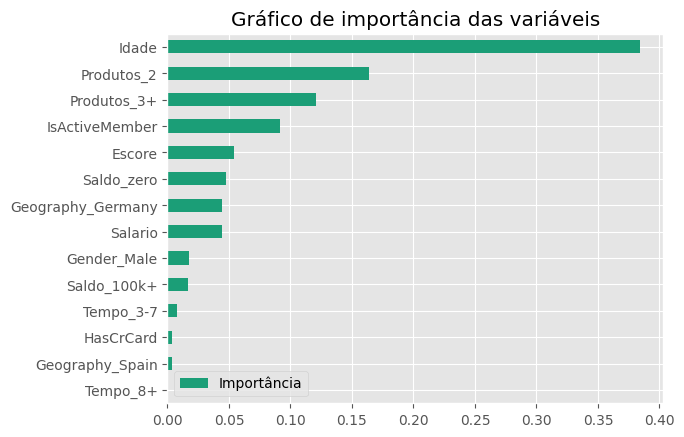

In [43]:
nomes = list(xtreino.columns)

x = np.arange(len(nomes))
y = arvore.feature_importances_

plt.style.use('ggplot')
data = pd.DataFrame({'Importância': y}, index = nomes)
data.sort_values(by = 'Importância').plot(kind = 'barh', colormap = 'Dark2')
plt.title('Gráfico de importância das variáveis')
plt.show()

# Quais ações tomar?

Podemos compor as faixas da seguinte maneira:
- 0% a 25% de probabilidade de Churn: Ações de Marketing Leves
- 25% a 50% de probabilidade de Churn: Ações de Marketing Intermediárias
- 50% a 75% de probabilidade de Churn: Ações de Marketing Fortes
- 75% a 100% de probabilidade de Churn: Ações de Marketing Agressivas

In [44]:
probs = pd.DataFrame(arvore.predict_proba(xteste))

def aux(x):
    if x < 0.25:
        return 'Leve'
    elif x < 0.5:
        return 'Intermediario'
    elif x < 0.75:
        return 'Forte'
    else:
        return 'Agressivo'

probs['Campanha'] = probs[1].apply(aux)

In [45]:
probs.sample(20)

,0,1,Campanha
45,0.770925,0.229075,Leve
201,0.974026,0.025974,Leve
726,0.995019,0.004981,Leve
908,0.883871,0.116129,Leve
633,0.753247,0.246753,Leve
953,0.940181,0.059819,Leve
978,0.750000,0.250000,Intermediario
47,0.940181,0.059819,Leve
86,0.931034,0.068966,Leve
219,0.800000,0.200000,Leve


In [46]:
probs['Campanha'].value_counts()

Leve             720
Intermediario    146
Agressivo         98
Forte             36
Name: Campanha, dtype: int64

# Criando uma Métrica Personalizada no Scikit-learn

In [47]:
# Testando minha metrica
def custo(observado, predito):
    mc = confusion_matrix(observado, predito)
    matriz_custo = [0, 1, 10, 1]
    return (mc * np.array(matriz_custo).reshape(2,2)).sum()

In [48]:
# Criando a metrica com a biblioteca make_score do Sklearn
from sklearn.metrics import make_scorer

minhametrica = make_scorer(custo, greater_is_better = False)
rl = cross_validate(LogisticRegression(), xtreino, ytreino, cv = validacao, scoring = minhametrica)
rl['test_score'].mean()

-1242.6333333333334